In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from openbb import obb
import numpy as np
plt.style.use('ggplot')

In [78]:
def lag_features(df , N , col , col_index):
    """adds lag features of the given columnb for previous N days"""
    for i in range(N):
        shifted_rows = np.zeros(len(df))
        shifted_rows[:] = np.nan
        array_index = i+1
        for j in range(len(df)-(i+1)):
            shifted_rows[array_index] = df.iloc[j,col_index]
            array_index = array_index + 1
            df[col+'_lag_'+str(i+1)] = shifted_rows
    return df

In [79]:
def directional_accuracy(gt, pred):
    """Calculates directional accuracy of given ground truth and prediction series.
    From Kaeley et al.
    
    inputs:
        gt: ground truth prices
        pred: predicted prices
        
    returns:
        acc: directional accuracy of predicted values
    """
    acc = []
    for i in range(1, len(gt)):
        if gt[i] >= gt[i-1] and pred[i] >= gt[i-1]:
            acc.append(1)
        elif gt[i] < gt[i-1] and pred[i] < gt[i-1]:
            acc.append(1)
        else:
            acc.append(0)

    return np.array(acc).mean()

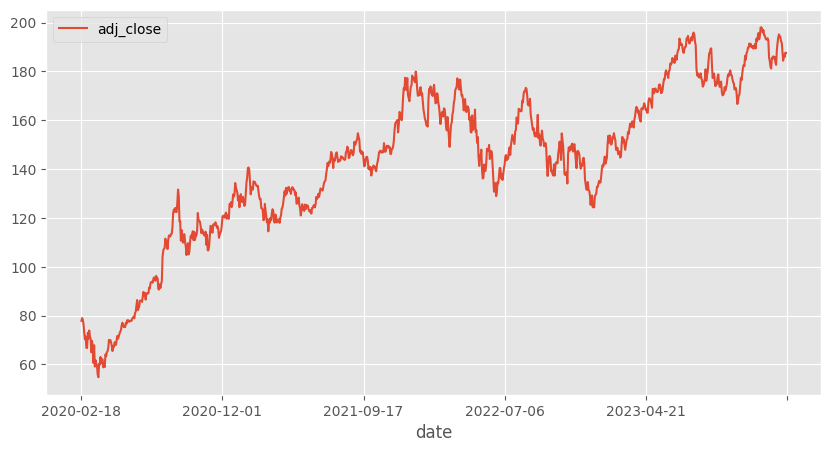

In [65]:
df = pd.read_csv("data/AAPL/AAPL_2004-1-2_1d.csv")
df = df.tail(1000)
df.plot('date', 'adj_close', figsize=(10,5))
plt.show()

In [66]:
df = df.drop(columns=["vwap", 'label', 'unadjusted_volume'])


In [67]:
df = lag_features(df, N=1, col='open', col_index=1)
df["forecast_pct_change"] = df['open_lag_1'].pct_change() * 100
df = df.drop(index=[4058, 4059])

In [103]:
df.head()

,date,open,high,low,close,volume,adj_close,change,change_percent,change_over_time,open_lag_1,forecast_pct_change
4060,2020-02-20,80.66,81.16,79.55,80.07,100566000,78.20,-0.59,-0.73147,-0.007315,80.00,1.471334
4061,2020-02-21,79.65,80.11,77.63,78.26,129554000,76.43,-1.39,-1.75000,-0.017500,80.66,0.825000
4062,2020-02-24,74.32,76.04,72.31,74.54,222195200,72.80,0.22,0.29602,0.002960,79.65,-1.252170
4063,2020-02-25,75.24,75.63,71.53,72.02,230673600,70.33,-3.22,-4.28000,-0.042800,74.32,-6.691777
4064,2020-02-26,71.63,74.47,71.63,73.16,198054800,71.45,1.53,2.14000,0.021400,75.24,1.237890


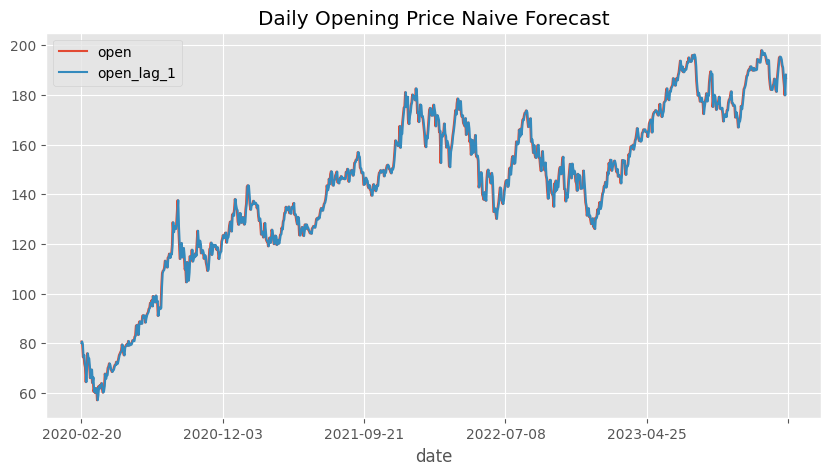

In [69]:
df.plot(x='date', y=['open', 'open_lag_1'], figsize=(10,5))
plt.grid(True, axis='y')
plt.title('Daily Opening Price Naive Forecast')
plt.show()

In [84]:
directional_accuracy(np.array(df['open']), np.array(df['open_lag_1']))

0.5346038114343029

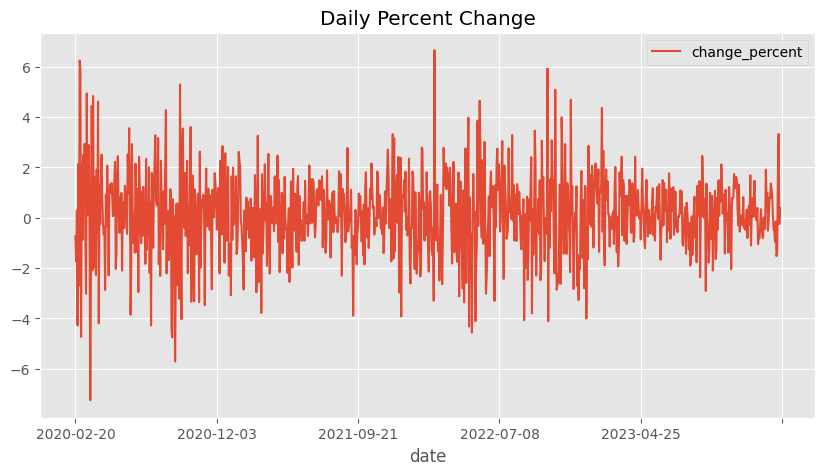

In [71]:
df.plot('date', ['change_percent'], figsize=(10,5))
plt.grid(True, axis='y')
plt.title('Daily Percent Change')
plt.show()

# Data normalization

In [101]:
def z_norm(df, cols):
    """Performs z-score normalization on cols of df
    
    inputs:
        df: stock data
        cols: columns to be normalized
        
    returns:
        df_std: normalized z-score data
    """

    df_std = df.copy()
    for c in cols:
        df_std[c] = (df_std[c] - df_std[c].mean()) / df_std[c].std()

    return df_std


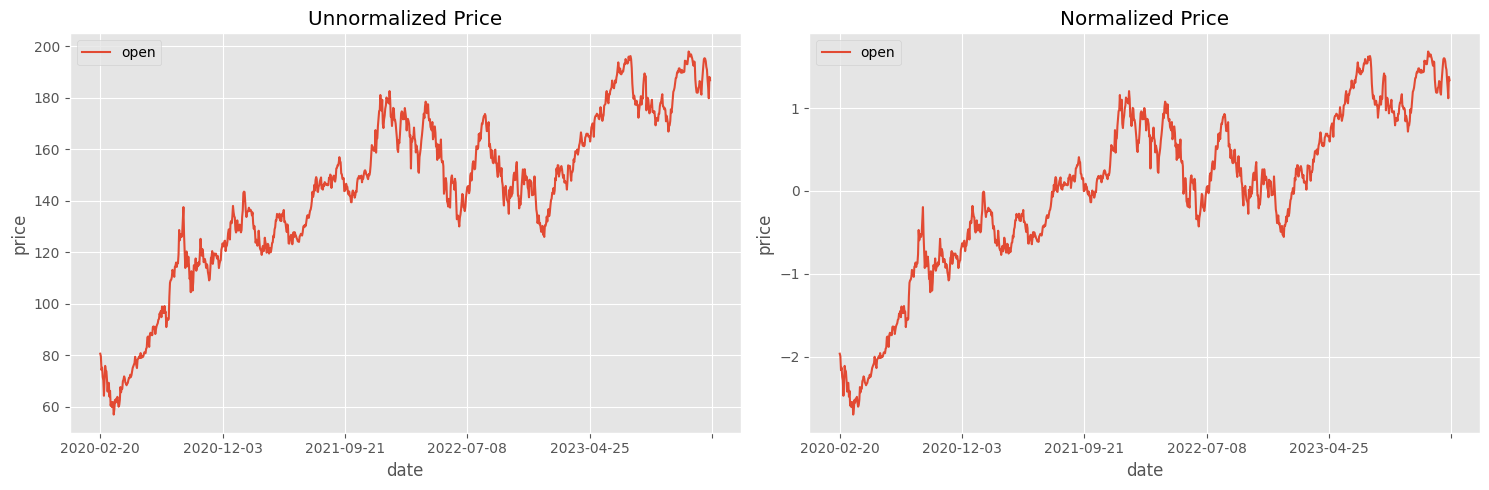

In [102]:
cols = list(df.columns)
cols.remove("date")

df_std = z_norm(df, cols)
fig, axs = plt.subplots(1,2)
df.plot(x='date', y='open', ax=axs[0], figsize=(15,5), ylabel="price")
df_std.plot(x='date', y='open', ax=axs[1], ylabel='price')
axs[0].set_title("Unnormalized Price")
axs[1].set_title("Normalized Price")
fig.tight_layout()
plt.show()